# Чтение HTML таблицы с помощью pandas

In [1]:
# https://pbpython.com/pandas-html-table.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')

In [3]:
print(f'Total tables: {len(table_MN)}')

Total tables: 28


In [4]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='Election results from statewide races')
len(table_MN)

1

In [6]:
df = table_MN[0]
df.head()

,Year,Office,GOP,DFL,Others
0,2020,President,45.3%,52.4%,2.3%
1,2020,Senator,43.5%,48.8%,7.7%
2,2018,Governor,42.4%,53.9%,3.7%
3,2018,Senator,36.2%,60.3%,3.4%
4,2018,Senator,42.4%,53.0%,4.6%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    26 non-null     int64 
 1   Office  26 non-null     object
 2   GOP     26 non-null     object
 3   DFL     26 non-null     object
 4   Others  26 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [8]:
df['GOP'].astype('float')

ValueError: could not convert string to float: '45.3%'

In [14]:
df['GOP'].replace({'%':''}, regex=True).astype('float')

0     45.3
1     43.5
2     42.4
3     36.2
4     42.4
5     44.9
6     44.5
7     42.9
8     45.1
9     30.6
10    43.2
11    43.8
12    42.0
13    46.7
14    37.9
15    47.6
16    44.4
17    49.5
18    45.5
19    43.3
20    34.3
21    35.0
22    41.3
23    63.3
24    49.1
25    31.9
Name: GOP, dtype: float64

In [15]:
df = df.replace({'%': ''}, regex=True)
df[['GOP', 'DFL', 'Others']] = df[['GOP', 'DFL', 'Others']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    26 non-null     int64  
 1   Office  26 non-null     object 
 2   GOP     26 non-null     float64
 3   DFL     26 non-null     float64
 4   Others  26 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


In [16]:
df.head()

,Year,Office,GOP,DFL,Others
0,2020,President,45.3,52.4,2.3
1,2020,Senator,43.5,48.8,7.7
2,2018,Governor,42.4,53.9,3.7
3,2018,Senator,36.2,60.3,3.4
4,2018,Senator,42.4,53.0,4.6


### Пример русской википедии

In [19]:
# https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

### Рождаемость и смертность в России

In [20]:
table_Rus = pd.read_html('https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F', 
                         match='Рождаемость и смертность в России')
len(table_Rus)

1

In [21]:
df = table_Rus[0]
df.head()

,Год,Рождаемость,Смертность,Прирост
0,1995,1 363 806,2 203 811,− 840 005
1,1999,1 214 689,2 144 316,− 929 627
2,2000,1 266 800,2 225 332,− 958 532
3,2001,1 311 604,2 254 856,− 943 252
4,2002,1 396 967,2 332 272,− 935 305


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Год          22 non-null     object
 1   Рождаемость  22 non-null     object
 2   Смертность   22 non-null     object
 3   Прирост      22 non-null     object
dtypes: object(4)
memory usage: 832.0+ bytes


In [24]:
df.head()

,Год,Рождаемость,Смертность,Прирост
0,1995,1363806,2203811,−840005
1,1999,1214689,2144316,−929627
2,2000,1266800,2225332,−958532
3,2001,1311604,2254856,−943252
4,2002,1396967,2332272,−935305


In [25]:
df.tail()

,Год,Рождаемость,Смертность,Прирост
17,2015,1940579,1908541,+32038
18,2016,1888729,1891015,−2286
19,2017,1690307,1826125,−135818
20,2018,1604344,1828910,−224566
21,Источник:Росстат[258],Источник:Росстат[258],Источник:Росстат[258],Источник:Росстат[258]


In [26]:
df.drop(21)

,Год,Рождаемость,Смертность,Прирост
0,1995,1363806,2203811,−840005
1,1999,1214689,2144316,−929627
2,2000,1266800,2225332,−958532
3,2001,1311604,2254856,−943252
4,2002,1396967,2332272,−935305
5,2003,1477301,2365826,−888525
6,2004,1502477,2295402,−792925
7,2005,1457376,2303935,−846559
8,2006,1479637,2166703,−687066
9,2007,1610122,2080445,−470323


In [27]:
df = df.drop(21)
df.head()

,Год,Рождаемость,Смертность,Прирост
0,1995,1363806,2203811,−840005
1,1999,1214689,2144316,−929627
2,2000,1266800,2225332,−958532
3,2001,1311604,2254856,−943252
4,2002,1396967,2332272,−935305


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Год          21 non-null     object
 1   Рождаемость  21 non-null     object
 2   Смертность   21 non-null     object
 3   Прирост      21 non-null     object
dtypes: object(4)
memory usage: 840.0+ bytes


In [30]:
df[['Год', 'Рождаемость', 'Смертность']] = df[['Год', 'Рождаемость', 'Смертность']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Год          21 non-null     int64 
 1   Рождаемость  21 non-null     int64 
 2   Смертность   21 non-null     int64 
 3   Прирост      21 non-null     object
dtypes: int64(3), object(1)
memory usage: 840.0+ bytes


In [31]:
df.head()

,Год,Рождаемость,Смертность,Прирост
0,1995,1363806,2203811,−840005
1,1999,1214689,2144316,−929627
2,2000,1266800,2225332,−958532
3,2001,1311604,2254856,−943252
4,2002,1396967,2332272,−935305


In [41]:
df = df.set_index("Год")
df.head()

,Рождаемость,Смертность,Прирост
Год,,,
1995,1363806,2203811,−840005
1999,1214689,2144316,−929627
2000,1266800,2225332,−958532
2001,1311604,2254856,−943252
2002,1396967,2332272,−935305


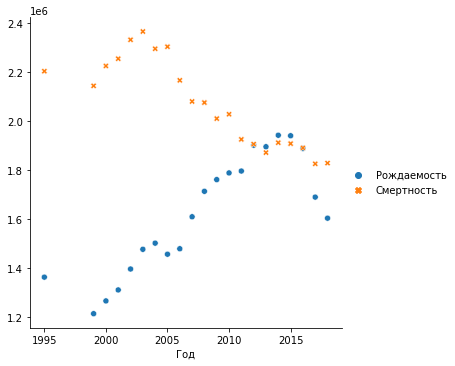

In [42]:
sns.relplot(data=df)

### Парсинг сырой строки

In [ ]:
# https://beenje.github.io/blog/posts/parsing-html-tables-in-python-with-pandas/

In [43]:
html_string = """
<table>
  <thead>
    <tr>
      <th>Programming Language</th>
      <th>Creator</th> 
      <th>Year</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>C</td>
      <td>Dennis Ritchie</td> 
      <td>1972</td>
    </tr>
    <tr>
      <td>Python</td>
      <td>Guido Van Rossum</td> 
      <td>1989</td>
    </tr>
    <tr>
      <td>Ruby</td>
      <td>Yukihiro Matsumoto</td> 
      <td>1995</td>
    </tr>
  </tbody>
</table>
"""

In [44]:
from IPython.display import display_html
display_html(html_string, raw=True)

Programming Language,Creator,Year
C,Dennis Ritchie,1972
Python,Guido Van Rossum,1989
Ruby,Yukihiro Matsumoto,1995


In [48]:
dfs = pd.read_html(html_string)
dfs

,Programming Language,Creator,Year
0,C,Dennis Ritchie,1972
1,Python,Guido Van Rossum,1989
2,Ruby,Yukihiro Matsumoto,1995


In [49]:
df = dfs[0]
df

,Programming Language,Creator,Year
0,C,Dennis Ritchie,1972
1,Python,Guido Van Rossum,1989
2,Ruby,Yukihiro Matsumoto,1995


In [50]:
df[df.Year > 1975]

,Programming Language,Creator,Year
1,Python,Guido Van Rossum,1989
2,Ruby,Yukihiro Matsumoto,1995


In [51]:
html_string = """
<table>
  <tr>
    <th>Programming Language</th>
    <th>Creator</th> 
    <th>Year</th>
  </tr>
  <tr>
    <td>C</td>
    <td>Dennis Ritchie</td> 
    <td>1972</td>
  </tr>
  <tr>
    <td>Python</td>
    <td>Guido Van Rossum</td> 
    <td>1989</td>
  </tr>
  <tr>
    <td>Ruby</td>
    <td>Yukihiro Matsumoto</td> 
    <td>1995</td>
  </tr>
</table>
"""

In [52]:
pd.read_html(html_string)[0]

,Programming Language,Creator,Year
0,C,Dennis Ritchie,1972
1,Python,Guido Van Rossum,1989
2,Ruby,Yukihiro Matsumoto,1995


### Парсинг

In [53]:
# https://www.contextures.com/xlsampledata01.html

In [55]:
dfs = pd.read_html('https://www.contextures.com/xlsampledata01.html')[0]
dfs.head()

,0,1,2,3,4,5,6
0,OrderDate,Region,Rep,Item,Units,UnitCost,Total
1,1/6/2019,East,Jones,Pencil,95,1.99,189.05
2,1/23/2019,Central,Kivell,Binder,50,19.99,999.50
3,2/9/2019,Central,Jardine,Pencil,36,4.99,179.64
4,2/26/2019,Central,Gill,Pen,27,19.99,539.73


In [56]:
dfs = pd.read_html('http://www.contextures.com/xlSampleData01.html', header=0)
dfs[0].head()

,OrderDate,Region,Rep,Item,Units,UnitCost,Total
0,1/6/2019,East,Jones,Pencil,95,1.99,189.05
1,1/23/2019,Central,Kivell,Binder,50,19.99,999.50
2,2/9/2019,Central,Jardine,Pencil,36,4.99,179.64
3,2/26/2019,Central,Gill,Pen,27,19.99,539.73
4,3/15/2019,West,Sorvino,Pencil,56,2.99,167.44


In [57]:
pd.read_html('https://en.wikipedia.org/wiki/Python_(programming_language)', header=0)[1]

,Type,Mutability,Description,Syntax examples
0,bool,immutable,Boolean value,TrueFalse
1,bytearray,mutable,Sequence of bytes,"bytearray(b'Some ASCII')bytearray(b""Some ASCII..."
2,bytes,immutable,Sequence of bytes,"b'Some ASCII'b""Some ASCII""bytes([119, 105, 107..."
3,complex,immutable,Complex number with real and imaginary parts,3+2.7j
4,dict,mutable,Associative array (or dictionary) of key and v...,"{'key1': 1.0, 3: False}{}"
5,ellipsisa,immutable,An ellipsis placeholder to be used as an index...,...Ellipsis
6,float,immutable,Double precision floating point number. The pr...,1.414
7,frozenset,immutable,"Unordered set, contains no duplicates; can con...","frozenset([4.0, 'string', True])"
8,int,immutable,Integer of unlimited magnitude[91],42
9,list,mutable,"List, can contain mixed types","[4.0, 'string', True][]"


In [59]:
import requests

r = requests.get('https://en.wikipedia.org/wiki/Python_(programming_language)')
pd.read_html(r.text, header=0)[1]

,Type,Mutability,Description,Syntax examples
0,bool,immutable,Boolean value,TrueFalse
1,bytearray,mutable,Sequence of bytes,"bytearray(b'Some ASCII')bytearray(b""Some ASCII..."
2,bytes,immutable,Sequence of bytes,"b'Some ASCII'b""Some ASCII""bytes([119, 105, 107..."
3,complex,immutable,Complex number with real and imaginary parts,3+2.7j
4,dict,mutable,Associative array (or dictionary) of key and v...,"{'key1': 1.0, 3: False}{}"
5,ellipsisa,immutable,An ellipsis placeholder to be used as an index...,...Ellipsis
6,float,immutable,Double precision floating point number. The pr...,1.414
7,frozenset,immutable,"Unordered set, contains no duplicates; can con...","frozenset([4.0, 'string', True])"
8,int,immutable,Integer of unlimited magnitude[91],42
9,list,mutable,"List, can contain mixed types","[4.0, 'string', True][]"


In [61]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/Timeline_of_programming_languages')[0]
dfs.head()

,0,1
0,NaN,This article has multiple issues. Please help ...
1,NaN,This article needs additional citations for ve...
2,NaN,This article relies too much on references to ...


In [62]:
len(dfs)

3

In [65]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/Timeline_of_programming_languages', header=0)
dfs[4]

,Year,Name,"Chief developer, company",Predecessor(s)
0,1804,Jacquard machine,Joseph Marie Jacquard,none (unique language)
1,1943–45,Plankalkül (concept),Konrad Zuse,none (unique language)
2,1943–46,ENIAC coding system,"John von Neumann, John Mauchly, J. Presper Eck...",none (unique language)
3,1946,ENIAC Short Code,"Richard Clippinger, John von Neumann after Ala...",ENIAC coding system
4,1946,Von Neumann and Goldstine graphing system (Not...,John von Neumann and Herman Goldstine,ENIAC coding system
5,1947,ARC Assembly,Kathleen Booth[1][2],ENIAC coding system
6,1948,CPC Coding scheme,Howard H. Aiken,Analytical Engine order code
7,1948,Curry notation system,Haskell Curry,ENIAC coding system
8,1948,Plankalkül (concept published),Konrad Zuse,none (unique language)
9,1949,EDSAC Initial Orders,David Wheeler,ENIAC coding system


In [66]:
df = pd.concat(dfs[4:12])
df

,Year,Name,"Chief developer, company",Predecessor(s)
0,1804,Jacquard machine,Joseph Marie Jacquard,none (unique language)
1,1943–45,Plankalkül (concept),Konrad Zuse,none (unique language)
2,1943–46,ENIAC coding system,"John von Neumann, John Mauchly, J. Presper Eck...",none (unique language)
3,1946,ENIAC Short Code,"Richard Clippinger, John von Neumann after Ala...",ENIAC coding system
4,1946,Von Neumann and Goldstine graphing system (Not...,John von Neumann and Herman Goldstine,ENIAC coding system
...,...,...,...,...
26,2017,Ballerina,"WSO2, Open Source[14]","Java, Javascript, Go, Rust, C#"
27,2018,C18,C18 ISO/IEC 9899:2018,NaN
28,2018,Fortran 2018,ISO/IEC JTC1/SC22/WG5 N2150:2018,Fortran 2008
29,2019,Bosque,"Mark Marron, Microsoft","JavaScript, TypeScript, ML"


In [67]:
prog_lang = df[df.Year != 'Year']
prog_lang

,Year,Name,"Chief developer, company",Predecessor(s)
0,1804,Jacquard machine,Joseph Marie Jacquard,none (unique language)
1,1943–45,Plankalkül (concept),Konrad Zuse,none (unique language)
2,1943–46,ENIAC coding system,"John von Neumann, John Mauchly, J. Presper Eck...",none (unique language)
3,1946,ENIAC Short Code,"Richard Clippinger, John von Neumann after Ala...",ENIAC coding system
4,1946,Von Neumann and Goldstine graphing system (Not...,John von Neumann and Herman Goldstine,ENIAC coding system
...,...,...,...,...
25,2017,C++17,C++ ISO/IEC 14882:2017,"C++, Standard C, C"
26,2017,Ballerina,"WSO2, Open Source[14]","Java, Javascript, Go, Rust, C#"
27,2018,C18,C18 ISO/IEC 9899:2018,NaN
28,2018,Fortran 2018,ISO/IEC JTC1/SC22/WG5 N2150:2018,Fortran 2008


In [68]:
prog_lang[prog_lang.Name == 'Python']

,Year,Name,"Chief developer, company",Predecessor(s)
65,1989,Python,Guido van Rossum,"ABC, SETL"


In [ ]:
# https://github.com/beenje/blog/blob/master/posts/parsing-html-tables-in-python-with-pandas.ipynb